# practice 3. 다중 선형 회귀, ridge, lasso

데이터 셋 링크: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

펭귄들의 종, 서식 지역, 부리 길이와 부리 깊이, 날개(?) 사이즈, 성별, 그리고 몸무게 데이터 셋이 있습니다. 다중 회귀 분석, 라쏘, 릿지 리그레션을 이용해서 몸무게를 예측하는 회귀 모델을 만들고, 어떤 독립변수가 가장 몸무게에 영향을 많이 미치는지 찾아보세요.

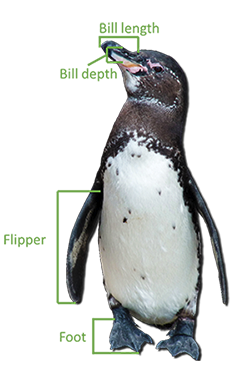

In [60]:
from utils import load_penguin_dataset

x_train, x_test, y_train, y_test = load_penguin_dataset()

In [61]:
x_train

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
225,Gentoo,Biscoe,46.5,13.5,210.0,FEMALE
119,Adelie,Torgersen,41.1,18.6,189.0,MALE
181,Chinstrap,Dream,52.8,20.0,205.0,MALE
167,Chinstrap,Dream,50.5,19.6,201.0,MALE
226,Gentoo,Biscoe,45.4,14.6,211.0,FEMALE
...,...,...,...,...,...,...
205,Chinstrap,Dream,50.7,19.7,203.0,MALE
54,Adelie,Biscoe,34.5,18.1,187.0,FEMALE
295,Gentoo,Biscoe,48.6,16.0,230.0,MALE
212,Chinstrap,Dream,51.9,19.5,206.0,MALE


In [ ]:
x_train['sex'].value_counts()

In [ ]:
x_train.nunique()

Label Encoding

1. sex
- 0 : None // 1 : FEMALE // 2 : MALE // 4 : .


2. species
- 2 : Gentoo // 0 : Adelie // 1 : Chinstrap

3. island
- 0 : Biscoe // 2 : Torgersen // 1 : Dream

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [63]:
x_train['sex'] = label_encoder.fit_transform(x_train['sex'])
x_train['species'] = label_encoder.fit_transform(x_train['species'])
x_train['island'] = label_encoder.fit_transform(x_train['island'])

In [64]:
x_test['sex'] = label_encoder.fit_transform(x_test['sex'])
x_test['species'] = label_encoder.fit_transform(x_test['species'])
x_test['island'] = label_encoder.fit_transform(x_test['island'])

In [68]:
import statsmodels.api as sm

def train_multiple_linear_regression(X,y):
    X_constant = sm.add_constant(X,has_constant = 'add')
    model = sm.OLS(y,X_constant)
    results = model.fit()
    return results

In [35]:
x_train['weight'] = y_train

<Axes: >

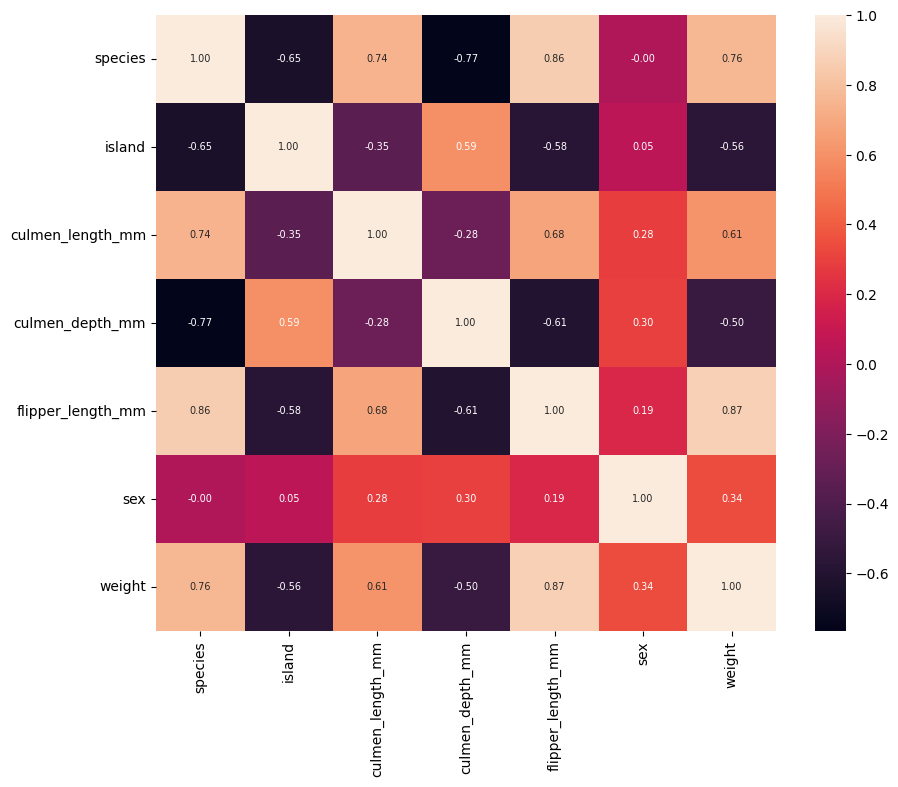

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(
    x_train.corr(),
    annot = True,
    fmt = '.2f',
    annot_kws = {'size' : 7}
)

In [40]:
x_cur_train = x_train[['flipper_length_mm','sex']]
results = train_multiple_linear_regression(x_cur_train,y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     510.1
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           1.99e-92
Time:                        15:38:46   Log-Likelihood:                -2002.1
No. Observations:                 273   AIC:                             4010.
Df Residuals:                     270   BIC:                             4021.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5825.2876    321.353    -18.127      0.000   -6457.964   -5192.611
flipper_length_mm    47.9128      1.624     29.507      0.000      44.716      51.110
sex                 261.1824     41.431      6.304      0.000     179.613     342.752
==============================================================================
Omnibus:                        0.295   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.136
Skew:                           0.037   Prob(JB):                        0.934
Kurtosis:                       3.080   Cond. No.                     2.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
x_cur_train = x_train[['flipper_length_mm','species']]
results = train_multiple_linear_regression(x_cur_train,y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     428.3
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           1.74e-84
Time:                        15:36:55   Log-Likelihood:                -2020.6
No. Observations:                 273   AIC:                             4047.
Df Residuals:                     270   BIC:                             4058.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5453.9960    626.256     -8.709      0.000   -6686.962   -4221.029
flipper_length_mm    47.8822      3.318     14.430      0.000      41.349      54.415
species              36.9197     52.424      0.704      0.482     -66.292     140.132
==============================================================================
Omnibus:                        4.326   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                4.224
Skew:                           0.305   Prob(JB):                        0.121
Kurtosis:                       3.011   Cond. No.                     5.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


def check_multi_colinearity(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF',ascending = False)

In [11]:
check_multi_colinearity(x_cur_train)

,Features,VIF
0,flipper_length_mm,8.953611
1,sex,8.953611


In [9]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

In [41]:
x_cur_train = x_train[['flipper_length_mm','sex']]
x_cur_test = x_test[['flipper_length_mm','sex']]

model = LinearRegression()
model.fit(x_cur_train,y_train)
y_pred = model.predict(x_cur_test)
print('R2 score', r2_score(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
print('sum of abs coefficient', np.abs(model.coef_).sum())

R2 score 0.6745892198424284
RMSE 434.39561430621177
sum of abs coefficient 309.0951862008404


In [27]:
model = Lasso()
model.fit(x_cur_train,y_train)
y_pred = model.predict(x_cur_test)
print('R2 score', r2_score(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
print('sum of abs coefficient', np.abs(model.coef_).sum())

R2 score 0.7520255405869923
RMSE 379.20402634069546
sum of abs coefficient 80.56477607019444


In [28]:
model = Ridge()
model.fit(x_cur_train,y_train)
y_pred = model.predict(x_cur_test)
print('R2 score', r2_score(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
print('sum of abs coefficient', np.abs(model.coef_).sum())

R2 score 0.7517979317620685
RMSE 379.37801681274686
sum of abs coefficient 84.24943807793485
